Instalar librerías


In [1]:
!pip install pandas google-cloud-bigquery scikit-learn

Realizar Autenticacion

In [2]:
from google.colab import auth
auth.authenticate_user()


Conectar a BigQuery e importar librerias

In [3]:
from google.cloud import bigquery
import pandas as pd

Define tu proyecto, dataset y tabla aquí

In [4]:
project_id = "proyecto2-hipotesis-lab"
dataset = "Dataset"
table = "view_plataformas"

Crea un cliente de BigQuery autenticado para el proyecto especificado

In [5]:
client = bigquery.Client("proyecto2-hipotesis-lab")

**HIPÓTESIS 1: Las canciones con un mayor BPM (Beats Por Minuto) tienen más éxito en términos de streams en Spotify**

Crear consulta con datos que necesitamos para nuestro dataframe

In [6]:
query = """
SELECT bpm, streams_numero
FROM `proyecto2-hipotesis-lab.Dataset.view_plataformas`
"""

Crear dataframe

In [7]:
df = client.query(query).to_dataframe()

Limpieza de datos

In [8]:
df['bpm'] = pd.to_numeric(df['bpm'], errors='coerce')
df['streams_numero'] = pd.to_numeric(df['streams_numero'], errors='coerce')
df = df.dropna(subset=['bpm', 'streams_numero'])
print(df.head())

   bpm  streams_numero
0  135      1297026226
1   96      1355959075
2   95       786181836
3  173      1755214421
4  138      1592909789


Dividir los datos en conjuntos de entrenamiento y prueba

In [9]:
from sklearn.model_selection import train_test_split

# Dividir los datos en variables predictoras (X) y la variable objetivo (y)
X = df[['bpm']]
y = df['streams_numero']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(755, 1) (189, 1) (755,) (189,)


Entrenar y evaluar el modelo de regresión lineal

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Crear una instancia del modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R^2): {r2}")

# Mostrar los coeficientes del modelo
print(f"Intercepción: {model.intercept_}")
print(f"Coeficiente: {model.coef_[0]}")

Error cuadrático medio (MSE): 3.1890603295274906e+17
Coeficiente de determinación (R^2): -0.0003296256420366461
Intercepción: 518079372.14366764
Coeficiente: -14448.855151167847


1.El MSE mide la magnitud promedio de los errores cuadrados entre las predicciones del modelo y los valores reales. Un MSE tan grande sugiere que las predicciones están muy lejos de los valores reales, lo que indica un mal ajuste del modelo.

2.Un R² negativo indica que el modelo no tiene poder predictivo.

3.Intercepción: Este es el valor de "streams" cuando el "bpm" es 0. Sin embargo, como los valores de bpm no pueden ser 0, esta intercepción no tiene un significado práctico directo pero es parte del cálculo del modelo.

4.Coeficiente: Este coeficiente indica que por cada incremento unitario en bpm, el "streams" disminuye en promedio en aproximadamente 14448.85 unidades. Dado que esto no parece razonable y el R² es negativo, esto también sugiere que el modelo no es adecuado.

Conclusión:
Se refuta la hipótesis inicial de que las canciones con un mayor bpm tienen más streams.

**GRÁFICA DISPERSIÓN - REGRESIÓN LINEAL - HIPÓTESIS 1**

Importar librerias

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Predecir en el conjunto de entrenamiento para dibujar la línea de regresión

In [12]:
y_train_pred = model.predict(X_train)

Crear una gráfica de dispersión

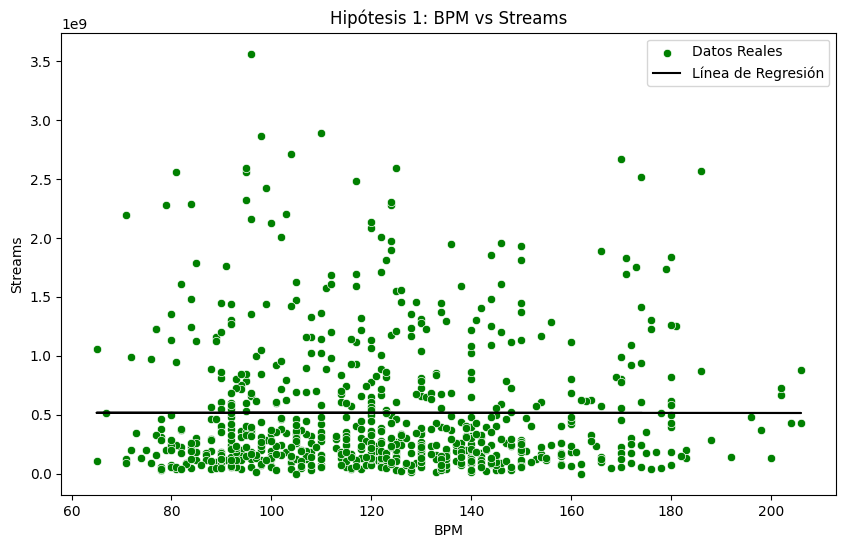

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train['bpm'], y=y_train, label='Datos Reales', color='green')
plt.plot(X_train['bpm'], y_train_pred, color='black', label='Línea de Regresión')
plt.title('Hipótesis 1: BPM vs Streams')
plt.xlabel('BPM')
plt.ylabel('Streams')
plt.legend()
plt.show()

**HIPÓTESIS 2: Las canciones más populares en el ranking de Spotify también tienen un comportamiento similar en otras plataformas como Deezer**

**Spotify vs Deezer**

Query para seleccionar datos a usar

In [6]:
query = """
SELECT in_spotify_charts, in_deezer_charts
FROM `proyecto2-hipotesis-lab.Dataset.view_plataformas`
"""

Crear dataframe

In [7]:
df = client.query(query).to_dataframe()

Limpieza de datos

In [8]:
df['in_spotify_charts'] = pd.to_numeric(df['in_spotify_charts'], errors='coerce')
df['in_deezer_charts'] = pd.to_numeric(df['in_deezer_charts'], errors='coerce')
df = df.dropna(subset=['in_spotify_charts', 'in_deezer_charts'])
print(df.head())

   in_spotify_charts  in_deezer_charts
0                110                 2
1                 53                 2
2                 42                 4
3                 43                 5
4                 62                 9


Dividir los datos en conjuntos de entrenamiento y prueba

In [9]:
from sklearn.model_selection import train_test_split

# Dividir los datos en variables predictoras (X) y la variable objetivo (y)
X = df[['in_spotify_charts']]
y = df['in_deezer_charts']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(755, 1) (189, 1) (755,) (189,)


Entrenar y evaluar el modelo de regresión lineal

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Crear una instancia del modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R^2): {r2}")

# Mostrar los coeficientes del modelo
print(f"Intercepción: {model.intercept_}")
print(f"Coeficiente: {model.coef_[0]}")

Error cuadrático medio (MSE): 21.5543438226604
Coeficiente de determinación (R^2): 0.4004457933944051
Intercepción: 0.5037406320271827
Coeficiente: 0.18002131752879133


Relación Moderada: El R² de 0.40 indica que hay una relación moderada entre in_spotify_charts y in_deezer_charts, pero no es lo suficientemente fuerte como para ser el único predictor de charts.

Modelo de Ajuste Moderado: El MSE de 21.55 sugiere que aunque el modelo hace un trabajo razonable prediciendo charts, hay un margen considerable de error. Nuevamente, esto sugiere que hay variabilidad en los datos que no está siendo capturada por in_deezer_charts solo.

Relación Positiva:El coeficiente positivo de 0.18 confirma que, en general, una mayor posicion en spotyfy está asociado con una mayor posicion en deezer, lo cual respalda la hipótesis inicial.

**GRÁFICA DISPERSIÓN - REGRESIÓN LINEAL - HIPÓTESIS 2**

**Spotify vs Deezer**

Importar librerias

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Predecir en el conjunto de entrenamiento para dibujar la línea de regresión

In [12]:
y_train_pred = model.predict(X_train)

Crear una gráfica de dispersión

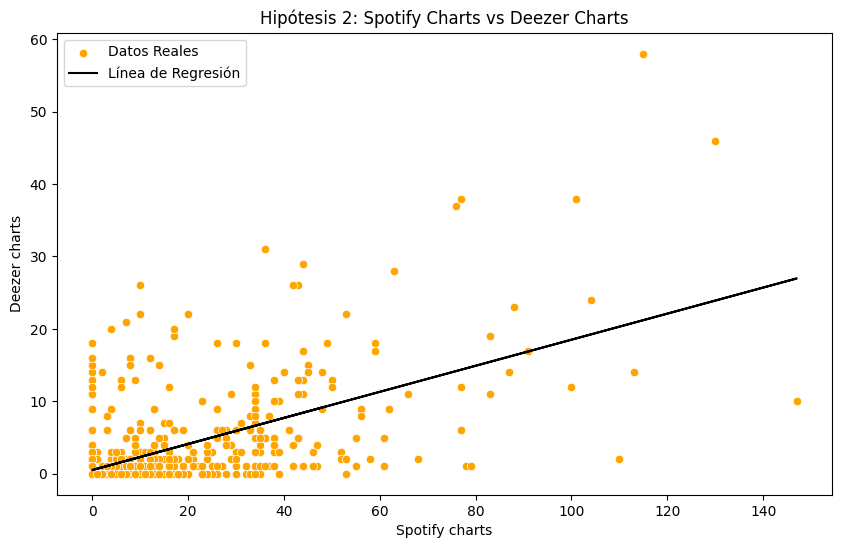

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train['in_spotify_charts'], y=y_train, label='Datos Reales', color='orange')
plt.plot(X_train['in_spotify_charts'], y_train_pred, color='black', label='Línea de Regresión')
plt.title('Hipótesis 2: Spotify Charts vs Deezer Charts')
plt.xlabel('Spotify charts')
plt.ylabel('Deezer charts')
plt.legend()
plt.show()

**Spotify vs Apple**

Query para seleccionar datos a usar

In [16]:
query = """
SELECT in_spotify_charts, in_apple_charts
FROM `proyecto2-hipotesis-lab.Dataset.view_plataformas`
"""

Crear dataframe

In [17]:
df = client.query(query).to_dataframe()

Limpieza de datos

In [18]:
df['in_spotify_charts'] = pd.to_numeric(df['in_spotify_charts'], errors='coerce')
df['in_apple_charts'] = pd.to_numeric(df['in_apple_charts'], errors='coerce')
df = df.dropna(subset=['in_spotify_charts', 'in_apple_charts'])
print(df.head())

   in_spotify_charts  in_apple_charts
0                110               98
1                 53              123
2                 42              111
3                 43                2
4                 62                0


Dividir los datos en conjuntos de entrenamiento y prueba

In [19]:
from sklearn.model_selection import train_test_split

# Dividir los datos en variables predictoras (X) y la variable objetivo (y)
X = df['in_spotify_charts']
y = df['in_apple_charts']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(755,) (189,) (755,) (189,)


Corregir el que no de pares de datos

In [20]:
import numpy as np

# Suponiendo que X_train es una lista o un array 1D
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(755, 1) (189, 1) (755,) (189,)


Entrenar y evaluar el modelo de regresión lineal



In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Crear una instancia del modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R^2): {r2}")

# Mostrar los coeficientes del modelo
print(f"Intercepción: {model.intercept_}")
print(f"Coeficiente: {model.coef_[0]}")

Error cuadrático medio (MSE): 1976.8643296982843
Coeficiente de determinación (R^2): 0.24968577987854879
Intercepción: 34.845478791842766
Coeficiente: 1.4310541598256816


El MSE de 1976.86 es un valor alto lo que indica que no hay un buen ajuste del modelo a los datos.
Un R² de 0.2497 indica que aproximadamente el 24.97% de los datos se pueden predecir por el modelo de regresión lineal.
Intercepción cuando la variable independiente es 0, el modelo predice que la variable dependiente será aproximadamente 34.85.
Coeficiente, sugiere una relación positiva, una mayor posición en spotify está asociado con una mayor posición en deezer.
Conclusión: Se válida la hipótesis inicial, pero la relación es débil como para ser un buen predictor por sí solo.



**GRÁFICA DISPERSIÓN - REGRESIÓN LINEAL - H2 Spotify vs Apple**

Importar librerias

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Predecir en el conjunto de entrenamiento para dibujar la línea de regresión

In [23]:
y_train_pred = model.predict(X_train)

Crear una gráfica de dispersión

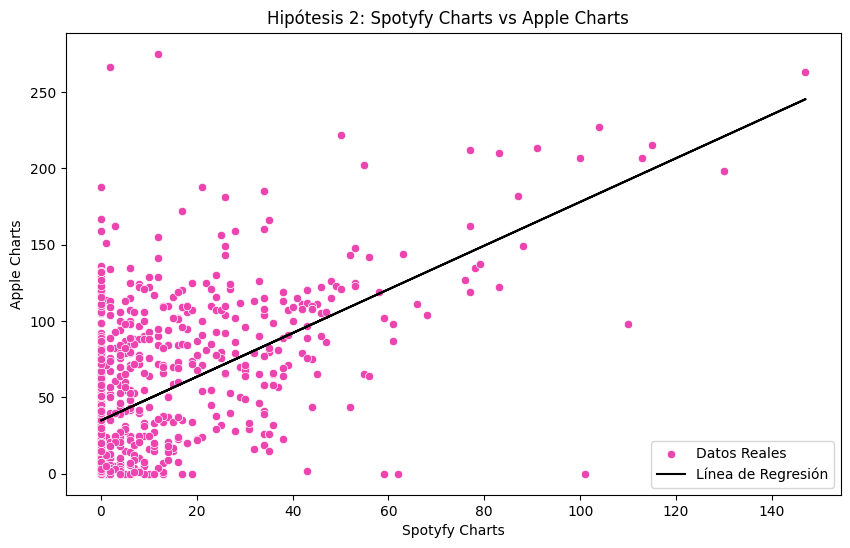

In [24]:
# Crear una gráfica de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train.flatten(), y=y_train, label='Datos Reales', color='#ED45AF')

# Dibujar la línea de regresión
plt.plot(X_train, y_train_pred, color='black', label='Línea de Regresión')

plt.title('Hipótesis 2: Spotyfy Charts vs Apple Charts  ')
plt.xlabel('Spotyfy Charts')
plt.ylabel('Apple Charts')
plt.legend()
plt.show()

**Spotify vs Shazam**

Query para seleccionar datos a usar

In [25]:
query = """
SELECT in_spotify_charts, in_shazam_charts
FROM `proyecto2-hipotesis-lab.Dataset.view_plataformas`
"""

Crear dataframe

In [26]:
df = client.query(query).to_dataframe()

Limpieza de datos

In [27]:
df['in_spotify_charts'] = pd.to_numeric(df['in_spotify_charts'], errors='coerce')
df['in_shazam_charts'] = pd.to_numeric(df['in_shazam_charts'], errors='coerce')
df = df.dropna(subset=['in_spotify_charts', 'in_shazam_charts'])
print(df.head())

   in_spotify_charts  in_shazam_charts
0                110                73
1                 53                81
2                 42                82
3                 43                 0
4                 62                 0


Dividir los datos en conjuntos de entrenamiento y prueba



In [28]:
from sklearn.model_selection import train_test_split

# Dividir los datos en variables predictoras (X) y la variable objetivo (y)
X = df['in_spotify_charts']
y = df['in_shazam_charts']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(715,) (179,) (715,) (179,)


Corregir que no da un par de datos

In [29]:
import numpy as np

# Suponiendo que X_train es una lista o un array 1D
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(715, 1) (179, 1) (715,) (179,)


Entrenar y evaluar el modelo de regresión lineal

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Crear una instancia del modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R^2): {r2}")

# Mostrar los coeficientes del modelo
print(f"Intercepción: {model.intercept_}")
print(f"Coeficiente: {model.coef_[0]}")

Error cuadrático medio (MSE): 14735.855116718994
Coeficiente de determinación (R^2): 0.44691000277096626
Intercepción: -0.8709355811230566
Coeficiente: 4.905546289495083


Conclusión:

Relación Moderada: El R² de 0.45 indica que hay una relación moderada entre "charts in Shazam" y "charts in Spotify", lo que sugiere que "charts in Spotify" es un predictor razonable del éxito en los charts de Shazam, pero hay otros factores importantes que también influyen.

Modelo de Ajuste Moderado: El MSE de 14735.86 sugiere que aunque el modelo hace un trabajo razonable prediciendo "charts in Spotify", hay un margen considerable de error. Esto implica que el modelo no es muy preciso, pero ofrece una indicación útil.

Relación Positiva: El coeficiente positivo de 4.91 confirma que, en general, un mejor desempeño en los "charts in spotify" está asociado con un mejor desempeño en los "charts in Shazam"

**GRÁFICA DISPERSIÓN - REGRESIÓN LINEAL - H2 Spotify vs Shazam**

Importar librerias

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Predecir en el conjunto de entrenamiento para dibujar la línea de regresión

In [32]:
y_train_pred = model.predict(X_train)


Crear una gráfica de dispersión

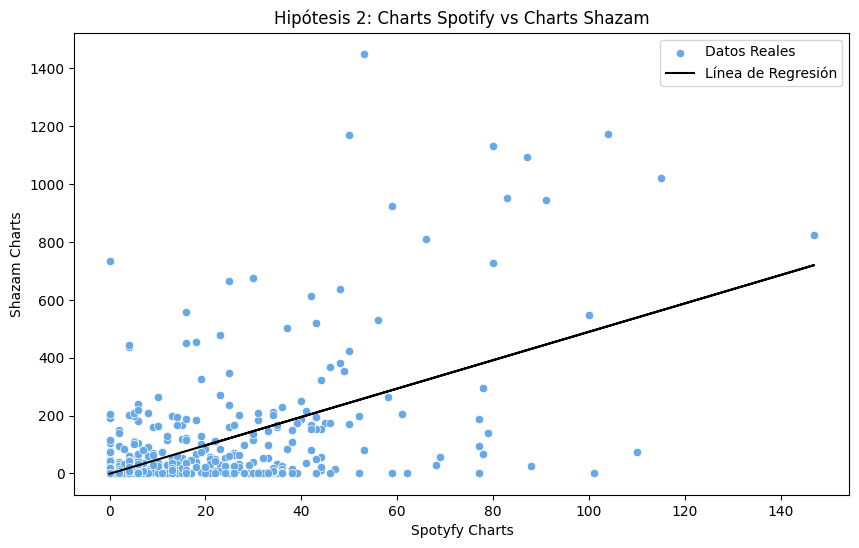

In [33]:
# Crear una gráfica de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train.flatten(), y=y_train, label='Datos Reales', color='#67A9E7')

# Dibujar la línea de regresión
plt.plot(X_train, y_train_pred, color='black', label='Línea de Regresión')

plt.title('Hipótesis 2: Charts Spotify vs Charts Shazam')
plt.xlabel('Spotyfy Charts')
plt.ylabel('Shazam Charts')
plt.legend()
plt.show()

**HIPÓTESIS 3: La presencia de una canción en un mayor número de playlists se relaciona con un mayor número de streams**

Crear consulta con datos que necesitamos para nuestro dataframe

In [34]:
query = """
SELECT total_part_playlist, streams_numero
FROM `proyecto2-hipotesis-lab.Dataset.view_plataformas`
"""

Crear dataframe

In [35]:
df = client.query(query).to_dataframe()

Limpieza de datos

In [36]:
df['total_part_playlist'] = pd.to_numeric(df['total_part_playlist'], errors='coerce')
df['streams_numero'] = pd.to_numeric(df['streams_numero'], errors='coerce')
df = df.dropna(subset=['total_part_playlist', 'streams_numero'])
print(df.head())

   total_part_playlist  streams_numero
0                13465      1297026226
1                11998      1355959075
2                 8075       786181836
3                35607      1755214421
4                38226      1592909789


Dividir los datos en conjuntos de entrenamiento y prueba

In [37]:
from sklearn.model_selection import train_test_split

# Dividir los datos en variables predictoras (X) y la variable objetivo (y)
X = df['total_part_playlist']
y = df['streams_numero']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(755,) (189,) (755,) (189,)


In [38]:
import numpy as np

# Suponiendo que X_train es una lista o un array 1D
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(755, 1) (189, 1) (755,) (189,)


Entrenar y evaluar el modelo de regresión lineal

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Crear una instancia del modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R^2): {r2}")

# Mostrar los coeficientes del modelo
print(f"Intercepción: {model.intercept_}")
print(f"Coeficiente: {model.coef_[0]}")

Error cuadrático medio (MSE): 1.275849895855914e+17
Coeficiente de determinación (R^2): 0.5997973331266275
Intercepción: 231242214.05101973
Coeficiente: 48560.98322485796


El valor de MSE es muy grande, lo que sugiere que aunque el modelo pueda capturar la tendencia general, hay una considerable variabilidad en los datos que no está siendo explicada completamente.

Un r2 de aproximadamente 0.6 indica que el 60% de la variación en el número de streams puede explicarse por el número de playlists en las que aparece la canción. Esto sugiere una relación moderadamente fuerte, pero no perfecta, entre las dos variables.

Intercepción: Indica que si una canción no aparece en ninguna playlist, aún se espera que tenga alrededor de 231,242,214 streams, lo cual podría reflejar la popularidad base de una canción debido a otros factores no modelados.

Coeficiente significa que, en promedio, por cada playlist adicional en la que aparece una canción, se espera que el número de streams aumente en 48,561. Este coeficiente positivo respalda tu hipótesis de que una mayor presencia en playlists se relaciona con un mayor número de streams.

Conclusión:
Los resultados sugieren que hay una relación positiva entre el número de playlists en las que aparece una canción y el número de streams que recibe. Aunque el r2 de 0.6 indica que esta relación explica una parte significativa de la variación en los streams, el MSE elevado muestra que hay otros factores no incluidos en el modelo que también influyen en el número de streams. Aún así, el coeficiente positivo y significativo refuerza la idea de que estar en más playlists se asocia con más streams.

**GRÁFICA DISPERSIÓN - REGRESIÓN LINEAL - HIPÓTESIS 3**

Importar librerias

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Predecir en el conjunto de entrenamiento para dibujar la línea de regresión

In [41]:
y_train_pred = model.predict(X_train)

Crear una gráfica de dispersión

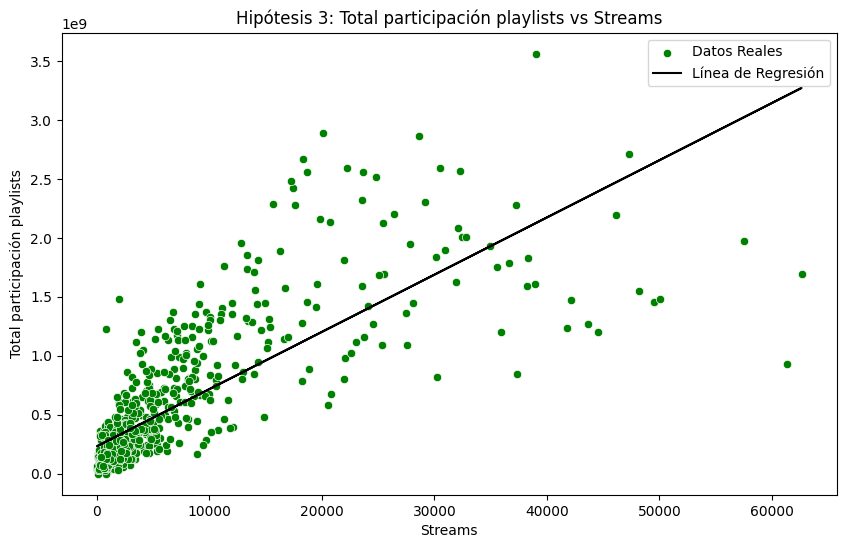

In [42]:
# Crear una gráfica de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train.flatten(), y=y_train, label='Datos Reales', color='green')

# Dibujar la línea de regresión
plt.plot(X_train, y_train_pred, color='black', label='Línea de Regresión')

plt.title('Hipótesis 3: Total participación playlists vs Streams')
plt.xlabel('Streams')
plt.ylabel('Total participación playlists')
plt.legend()
plt.show()

**HIPÓTESIS 4: Los artistas con un mayor número de canciones en Spotify tienen más streams**

Crear consulta con datos que necesitamos para nuestro dataframe

In [47]:
query = """
SELECT total_canciones, total_streams
FROM `proyecto2-hipotesis-lab.Dataset.view_hipotesis4`
"""

Crear un dataframe

In [48]:
df = client.query(query).to_dataframe()

Limpieza de datos

In [49]:
df['total_canciones'] = pd.to_numeric(df['total_canciones'], errors='coerce')
df['total_streams'] = pd.to_numeric(df['total_streams'], errors='coerce')
df = df.dropna(subset=['total_canciones', 'total_streams'])
print(df.head())

   total_canciones  total_streams
0                2      266983330
1                1     1202722675
2                4     4508746590
3                1      838586769
4                1      118810253


Dividir los datos en conjuntos de entrenamiento y prueba

In [50]:
from sklearn.model_selection import train_test_split

# Dividir los datos en variables predictoras (X) y la variable objetivo (y)
X = df['total_canciones']
y = df['total_streams']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(239,) (60,) (239,) (60,)


In [51]:
import numpy as np

# Suponiendo que X_train es una lista o un array 1D
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(239, 1) (60, 1) (239,) (60,)


Entrenar y evaluar el modelo de regresión lineal

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Crear una instancia del modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R^2): {r2}")

# Mostrar los coeficientes del modelo
print(f"Intercepción: {model.intercept_}")
print(f"Coeficiente: {model.coef_[0]}")

Error cuadrático medio (MSE): 1.377236569956644e+18
Coeficiente de determinación (R^2): 0.7537531924491054
Intercepción: 194858748.11261463
Coeficiente: 453769865.76784766


Un MSE elevado, como en este caso, sugiere que, aunque el modelo puede capturar la tendencia general, hay una considerable variabilidad en los datos que no está siendo explicada completamente.

Un r2 de aproximadamente 0.75 indica que el 75% de la variación en el número de streams puede explicarse por el número de canciones que tiene un artista en Spotify. Esto sugiere una relación fuerte entre las dos variables, lo cual respalda la hipótesis de que los artistas con más canciones tienden a tener más streams.

La intercepción, en este contexto, indica que si un artista no tuviera ninguna canción en Spotify, aún se espera que tenga alrededor de 194,858,748 streams. Este valor puede ser interpretado como la popularidad base de un artista debido a otros factores no modelados.

El coeficiente significa que, en promedio, por cada canción adicional que un artista tiene en Spotify, se espera que el número de streams aumente en 453,769,866. Este coeficiente positivo y significativo respalda fuertemente la hipótesis de que un mayor número de canciones está asociado con un mayor número de streams.

Conclusión:
Los resultados sugieren una relación positiva y fuerte entre el número de canciones de un artista en Spotify y el número de streams que recibe. Aunque el MSE elevado indica que hay otros factores que también influyen en el número de streams y no están incluidos en el modelo, el r2 de 0.75 muestra que una gran parte de la variación en los streams puede ser explicada por el número de canciones. El coeficiente positivo y significativo refuerza la hipótesis de que los artistas con más canciones tienden a tener más streams.

**GRÁFICA DISPERSIÓN - REGRESIÓN LINEAL - HIPÓTESIS 4**

Importar librerias

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Predecir en el conjunto de entrenamiento para dibujar la línea de regresión

In [54]:
# Predecir en el conjunto de entrenamiento para dibujar la línea de regresión
y_train_pred = model.predict(X_train)


Crear una gráfica de dispersión

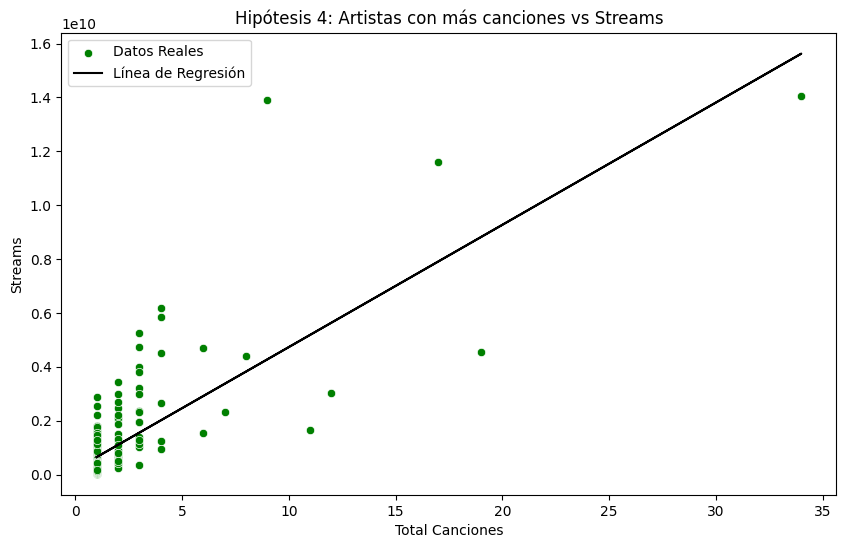

In [56]:
# Crear una gráfica de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train.flatten(), y=y_train, label='Datos Reales', color='green')

# Dibujar la línea de regresión
plt.plot(X_train, y_train_pred, color='black', label='Línea de Regresión')

plt.title('Hipótesis 4: Artistas con más canciones vs Streams')
plt.xlabel('Total Canciones')
plt.ylabel('Streams')
plt.legend()
plt.show()

**HIPÓTESIS 5: Las características de la canción influyen en el éxito en términos de streams en Spotify**

**1. Danceability**

Crear consulta con datos que necesitamos para nuestro dataframe

In [57]:
query = """
SELECT `danceability_%`, streams_numero
FROM `proyecto2-hipotesis-lab.Dataset.view_plataformas`
"""

Crear dataframe

In [58]:
df = client.query(query).to_dataframe()

Limpieza de datos

In [59]:
df['streams_numero'] = pd.to_numeric(df['streams_numero'], errors='coerce')
df['danceability_%'] = pd.to_numeric(df['danceability_%'], errors='coerce')
df = df.dropna(subset=['streams_numero', 'danceability_%'])
print(df.head())

   danceability_%  streams_numero
0              48      1297026226
1              75      1355959075
2              60       786181836
3              43      1755214421
4              49      1592909789


Dividir los datos en conjuntos de entrenamiento y prueba

In [60]:
from sklearn.model_selection import train_test_split

# Dividir los datos en variables predictoras (X) y la variable objetivo (y)
X = df['danceability_%']
y = df['streams_numero']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(755,) (189,) (755,) (189,)


In [61]:
import numpy as np

# Suponiendo que X_train es una lista o un array 1D
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(755, 1) (189, 1) (755,) (189,)


Entrenar y evaluar el modelo de regresión lineal

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Crear una instancia del modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R^2): {r2}")

# Mostrar los coeficientes del modelo
print(f"Intercepción: {model.intercept_}")
print(f"Coeficiente: {model.coef_[0]}")

Error cuadrático medio (MSE): 3.124828603648244e+17
Coeficiente de determinación (R^2): 0.01981828366786642
Intercepción: 754197652.8166625
Coeficiente: -3561913.4172532973


Un MSE de 3.124828603648244e+17 es extremadamente alto, lo que indica que las predicciones del modelo son bastante inexactas.

Un R² de 0.01981828366786642 significa que solo el 1.98% de la variabilidad en los streams puede ser explicada por la danceability. Esto sugiere que la danceability no es un buen predictor del éxito en términos de cantidad de streams en Spotify.

Intercepción: En este caso, la intercepción es de 754197652.8166625, lo que representa la predicción base de la cantidad de streams sin considerar la danceability.

Coeficiente (Coefficient):
El coeficiente para la danceability es -3561913.4172532973. Esto significa que por cada unidad de aumento en la danceability, se espera que la cantidad de streams disminuya en 3561913.4172532973 unidades. Este coeficiente negativo sugiere una relación inversa entre danceability y la cantidad de streams.

Conclusión
La hipótesis de que la danceability influye significativamente en el éxito en términos de cantidad de streams en Spotify no se sostiene. El modelo muestra que la danceability tiene un impacto mínimo y, de hecho, parece tener una relación negativa con la cantidad de streams. Además, la alta magnitud del MSE y el bajo R² indican que el modelo no es adecuado para predecir el éxito en términos de streams basándose en la danceability.






**GRÁFICA DISPERSIÓN - REGRESIÓN LINEAL - HIPÓTESIS 5**

**1. Danceability vs Streams**

Importar librerias

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Predecir en el conjunto de entrenamiento para dibujar la línea de regresión

In [44]:
y_train_pred = model.predict(X_train)

Crear una gráfica de dispersión

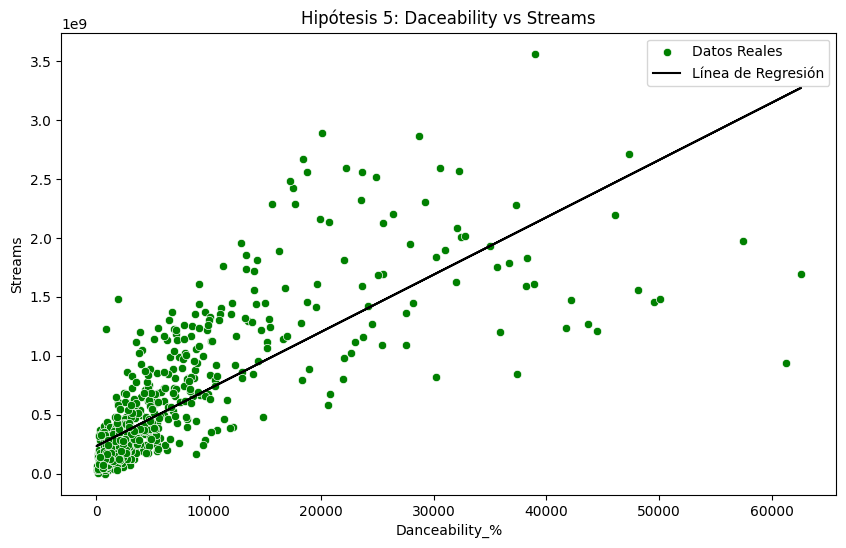

In [45]:
# Crear una gráfica de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train.flatten(), y=y_train, label='Datos Reales', color='green')

# Dibujar la línea de regresión
plt.plot(X_train, y_train_pred, color='black', label='Línea de Regresión')

plt.title('Hipótesis 5: Daceability vs Streams')
plt.xlabel('Danceability_%')
plt.ylabel('Streams')
plt.legend()
plt.show()

**2. Liveness vs Streams**

Crear consulta con datos que necesitamos para nuestro dataframe

In [46]:
query = """
SELECT `liveness_%`, streams_numero
FROM `proyecto2-hipotesis-lab.Dataset.view_plataformas`
"""

Crear dataframe

In [47]:
df = client.query(query).to_dataframe()

Limpieza de datos

In [48]:
df['streams_numero'] = pd.to_numeric(df['streams_numero'], errors='coerce')
df['liveness_%'] = pd.to_numeric(df['liveness_%'], errors='coerce')
df = df.dropna(subset=['streams_numero', 'liveness_%'])
print(df.head())

   liveness_%  streams_numero
0          11      1297026226
1          13      1355959075
2          12       786181836
3          23      1755214421
4          11      1592909789


Dividir los datos en conjuntos de entrenamiento y prueba

In [49]:
from sklearn.model_selection import train_test_split

# Dividir los datos en variables predictoras (X) y la variable objetivo (y)
X = df['liveness_%']
y = df['streams_numero']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(755,) (189,) (755,) (189,)


In [50]:
import numpy as np

# Suponiendo que X_train es una lista o un array 1D
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(755, 1) (189, 1) (755,) (189,)


Entrenar y evaluar el modelo de la regresión lineal

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Crear una instancia del modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R^2): {r2}")

# Mostrar los coeficientes del modelo
print(f"Intercepción: {model.intercept_}")
print(f"Coeficiente: {model.coef_[0]}")

Error cuadrático medio (MSE): 3.167159734862173e+17
Coeficiente de determinación (R^2): 0.006540051127653657
Intercepción: 542243879.0230006
Coeficiente: -1424267.01610165



Un MSE de 3.167159734862173e+17 es extremadamente alto, indicando que las predicciones del modelo son bastante inexactas.

Un R² de 0.006540051127653657 significa que solo el 0.65% de la variabilidad en los streams puede ser explicada por la liveness. Esto sugiere que la liveness no es un buen predictor del éxito en términos de cantidad de streams en Spotify.

Intercepción (Intercept):
La intercepción es el valor de la cantidad de streams cuando la liveness es 0. En este caso, la intercepción es de 542243879.0230006, lo que representa la predicción base de la cantidad de streams sin considerar la liveness.

Coeficiente (Coefficient):
El coeficiente para la liveness es -1424267.01610165. Esto significa que por cada unidad de aumento en la liveness, se espera que la cantidad de streams disminuya en 1424267.01610165 unidades. Este coeficiente negativo sugiere una relación inversa entre liveness y la cantidad de streams.

Conclusión
La hipótesis de que la liveness influye significativamente en el éxito en términos de cantidad de streams en Spotify no se sostiene. El modelo muestra que la liveness tiene un impacto mínimo y, de hecho, parece tener una relación negativa con la cantidad de streams. Además, la alta magnitud del MSE y el bajo R² indican que el modelo no es adecuado para predecir el éxito en términos de streams basándose en la liveness.

**GRÁFICO**

Importar librerias

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Predecir en el conjunto de entrenamiento para dibujar la línea de regresión

In [53]:
y_train_pred = model.predict(X_train)

Crear una gráfica de dispersión

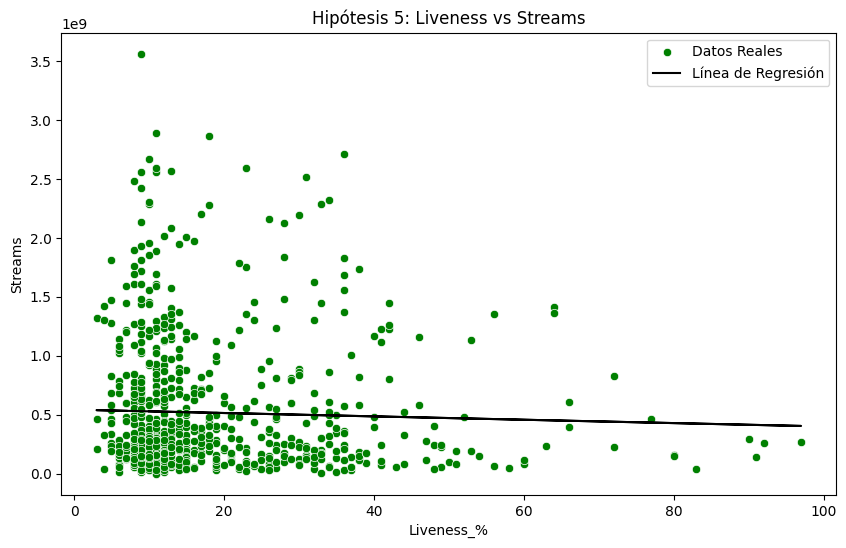

In [54]:
# Crear una gráfica de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train.flatten(), y=y_train, label='Datos Reales', color='green')

# Dibujar la línea de regresión
plt.plot(X_train, y_train_pred, color='black', label='Línea de Regresión')

plt.title('Hipótesis 5: Liveness vs Streams')
plt.xlabel('Liveness_%')
plt.ylabel('Streams')
plt.legend()
plt.show()

**3. Instrumentalness vs Streams**

Crear consulta con datos que necesitamos para nuestro dataframe

In [55]:
query = """
SELECT `instrumentalness_%`, streams_numero
FROM `proyecto2-hipotesis-lab.Dataset.view_plataformas`
"""

Crear dataframe

In [56]:
df = client.query(query).to_dataframe()

Limpieza de datos

In [57]:
df['streams_numero'] = pd.to_numeric(df['streams_numero'], errors='coerce')
df['instrumentalness_%'] = pd.to_numeric(df['instrumentalness_%'], errors='coerce')
df = df.dropna(subset=['streams_numero', 'instrumentalness_%'])
print(df.head())

   instrumentalness_%  streams_numero
0                   2      1297026226
1                   0      1355959075
2                   0       786181836
3                   0      1755214421
4                   0      1592909789


Dividir los datos en conjuntos de entrenamiento y prueba

In [58]:
from sklearn.model_selection import train_test_split

# Dividir los datos en variables predictoras (X) y la variable objetivo (y)
X = df['instrumentalness_%']
y = df['streams_numero']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(755,) (189,) (755,) (189,)


In [59]:
import numpy as np

# Suponiendo que X_train es una lista o un array 1D
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(755, 1) (189, 1) (755,) (189,)


Entrenar y evaluar el modelo de la regresión lineal

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Crear una instancia del modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R^2): {r2}")

# Mostrar los coeficientes del modelo
print(f"Intercepción: {model.intercept_}")
print(f"Coeficiente: {model.coef_[0]}")

Error cuadrático medio (MSE): 3.186896882065557e+17
Coeficiente de determinación (R^2): 0.0003489945049873766
Intercepción: 521574809.3676341
Coeficiente: -3009595.266891558


Un MSE de 3.186896882065557e+17 es extremadamente alto, indicando que las predicciones del modelo son bastante inexactas.

Un R² de 0.0003489945049873766 significa que solo el 0.03% de la variabilidad en los streams puede ser explicada por la instrumentalness. Esto sugiere que la instrumentalness no es un buen predictor del éxito en términos de cantidad de streams en Spotify.

Intercepción (Intercept):
La intercepción es el valor de la cantidad de streams cuando la instrumentalness es 0. En este caso, la intercepción es de 521574809.3676341, lo que representa la predicción base de la cantidad de streams sin considerar la instrumentalness.

Coeficiente (Coefficient):
Significa que por cada unidad de aumento en la instrumentalness, se espera que la cantidad de streams disminuya en 3009595.266891558 unidades. Este coeficiente negativo sugiere una relación inversa entre instrumentalness y la cantidad de streams.

Conclusión
La hipótesis de que la instrumentalness influye significativamente en el éxito en términos de cantidad de streams en Spotify no se sostiene. El modelo muestra que instrumentalness tiene un impacto mínimo y, de hecho, parece tener una relación negativa con la cantidad de streams. Además, la alta magnitud del MSE y el extremadamente bajo R² indican que el modelo no es adecuado para predecir el éxito en términos de streams basándose en la instrumentalness.

**GRAFICA**

Importar librerias

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Predecir en el conjunto de entrenamiento para dibujar la línea de regresión



In [62]:
y_train_pred = model.predict(X_train)

Crear una gráfica de dispersión

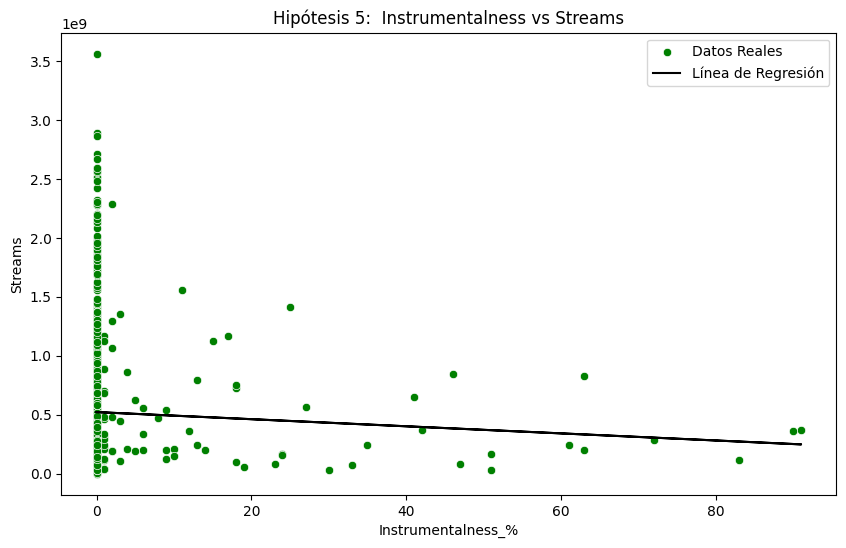

In [63]:
# Crear una gráfica de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train.flatten(), y=y_train, label='Datos Reales', color='green')

# Dibujar la línea de regresión
plt.plot(X_train, y_train_pred, color='black', label='Línea de Regresión')

plt.title('Hipótesis 5:  Instrumentalness vs Streams')
plt.xlabel('Instrumentalness_%')
plt.ylabel('Streams')
plt.legend()
plt.show()

**4. Acousticness vs Streams**

Crear consulta con datos que necesitamos para nuestro dataframe

In [64]:
query = """
SELECT `acousticness_%`, streams_numero
FROM `proyecto2-hipotesis-lab.Dataset.view_plataformas`
"""

Crear dataframe

In [65]:
df = client.query(query).to_dataframe()

Limpieza de datos

In [66]:
df['streams_numero'] = pd.to_numeric(df['streams_numero'], errors='coerce')
df['acousticness_%'] = pd.to_numeric(df['acousticness_%'], errors='coerce')
df = df.dropna(subset=['streams_numero', 'acousticness_%'])
print(df.head())

   acousticness_%  streams_numero
0              12      1297026226
1               9      1355959075
2               0       786181836
3               0      1755214421
4               9      1592909789


Dividir los datos en conjuntos de entrenamiento y prueba

In [67]:
from sklearn.model_selection import train_test_split

# Dividir los datos en variables predictoras (X) y la variable objetivo (y)
X = df['acousticness_%']
y = df['streams_numero']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(755,) (189,) (755,) (189,)


In [68]:
import numpy as np

# Suponiendo que X_train es una lista o un array 1D
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(755, 1) (189, 1) (755,) (189,)


Entrenar y evaluar el modelo de la regresión lineal

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Crear una instancia del modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R^2): {r2}")

# Mostrar los coeficientes del modelo
print(f"Intercepción: {model.intercept_}")
print(f"Coeficiente: {model.coef_[0]}")

Error cuadrático medio (MSE): 3.1889904031590746e+17
Coeficiente de determinación (R^2): -0.000307691463716786
Intercepción: 519052870.0753346
Coeficiente: -101639.24942977371


Un MSE de 3.1889904031590746e+17 es extremadamente alto, indicando que las predicciones del modelo son bastante inexactas.

Un R² de -0.000307691463716786 significa que el modelo está peor que simplemente usar la media de los datos como predicción. Este valor negativo indica que la variable acousticness no explica la variabilidad en los streams y que el modelo no es adecuado para predecir la cantidad de streams basándose en acousticness.

Intercepción (Intercept):
La intercepción es el valor de la cantidad de streams cuando la acousticness es 0. En este caso, la intercepción es de 519052870.0753346, lo que representa la predicción base de la cantidad de streams sin considerar la acousticness.

Coeficiente (Coefficient):
El coeficiente para la acousticness es -101639.24942977371. Esto significa que por cada unidad de aumento en la acousticness, se espera que la cantidad de streams disminuya en 101639.24942977371 unidades. Este coeficiente negativo sugiere una relación inversa entre acousticness y la cantidad de streams, aunque el efecto es relativamente pequeño comparado con la magnitud de los datos.

Conclusión
La hipótesis de que la acousticness influye significativamente en el éxito en términos de cantidad de streams en Spotify no se sostiene. El modelo muestra que la característica acousticness tiene un impacto mínimo y, de hecho, parece tener una relación negativa con la cantidad de streams. Además, la alta magnitud del MSE y el valor negativo del R² indican que el modelo no es adecuado para predecir el éxito en términos de streams basándose en la acousticness.

**GRÁFICA**

Importar librerias

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Predecir en el conjunto de entrenamiento para dibujar la línea de regresión



In [71]:
y_train_pred = model.predict(X_train)

Crear una gráfica de dispersión

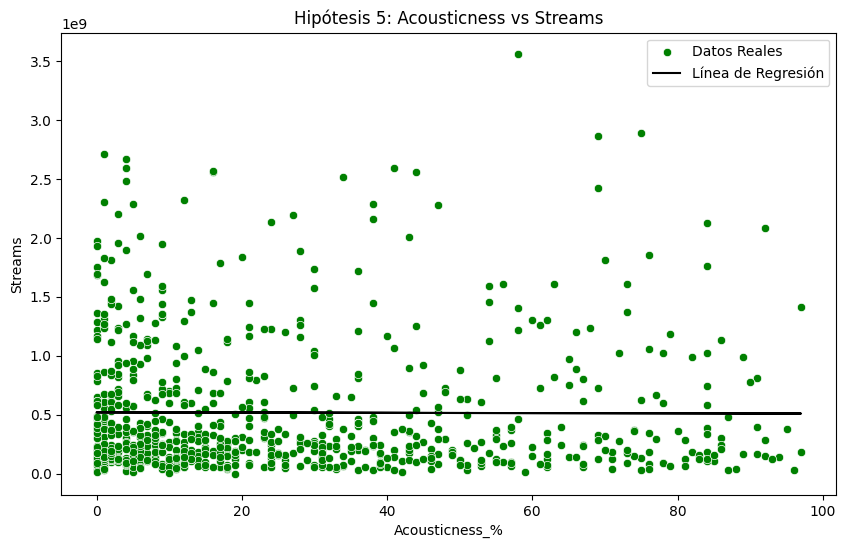

In [72]:
# Crear una gráfica de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train.flatten(), y=y_train, label='Datos Reales', color='green')

# Dibujar la línea de regresión
plt.plot(X_train, y_train_pred, color='black', label='Línea de Regresión')

plt.title('Hipótesis 5: Acousticness vs Streams')
plt.xlabel('Acousticness_%')
plt.ylabel('Streams')
plt.legend()
plt.show()

**5. Energy vs Streams**

Crear consulta con datos que necesitamos para nuestro dataframe

In [73]:
query = """
SELECT `energy_%`, streams_numero
FROM `proyecto2-hipotesis-lab.Dataset.view_plataformas`
"""

Crear dataframe

In [74]:
df = client.query(query).to_dataframe()

Limpieza de datos

In [75]:
df['streams_numero'] = pd.to_numeric(df['streams_numero'], errors='coerce')
df['energy_%'] = pd.to_numeric(df['energy_%'], errors='coerce')
df = df.dropna(subset=['streams_numero', 'energy_%'])
print(df.head())

   energy_%  streams_numero
0        42      1297026226
1        68      1355959075
2        79       786181836
3        66      1755214421
4        62      1592909789


Dividir los datos en conjuntos de entrenamiento y prueba

In [76]:
from sklearn.model_selection import train_test_split

# Dividir los datos en variables predictoras (X) y la variable objetivo (y)
X = df['energy_%']
y = df['streams_numero']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(755,) (189,) (755,) (189,)


In [77]:
import numpy as np

# Suponiendo que X_train es una lista o un array 1D
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(755, 1) (189, 1) (755,) (189,)


Entrenar y evaluar el modelo de la regresión lineal

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Crear una instancia del modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R^2): {r2}")

# Mostrar los coeficientes del modelo
print(f"Intercepción: {model.intercept_}")
print(f"Coeficiente: {model.coef_[0]}")

Error cuadrático medio (MSE): 3.191199432101503e+17
Coeficiente de determinación (R^2): -0.0010006093977401598
Intercepción: 584343722.8663057
Coeficiente: -1060671.6164008593


Un MSE de 3.191199432101503e+17 es extremadamente alto, indicando que las predicciones del modelo son bastante inexactas.

Un R² de -0.0010006093977401598 significa que el modelo está peor que simplemente usar la media de los datos como predicción. Este valor negativo indica que la variable energy no explica la variabilidad en los streams y que el modelo no es adecuado para predecir la cantidad de streams basándose en energy.

Intercepción (Intercept):
La intercepción es el valor de la cantidad de streams cuando la energy es 0. En este caso, la intercepción es de 584343722.8663057, lo que representa la predicción base de la cantidad de streams sin considerar la energy.

Coeficiente (Coefficient):
El coeficiente para la energy es -1060671.6164008593. Esto significa que por cada unidad de aumento en la energy, se espera que la cantidad de streams disminuya en 1060671.6164008593 unidades. Este coeficiente negativo sugiere una relación inversa entre energy y la cantidad de streams, aunque el efecto es relativamente pequeño comparado con la magnitud de los datos.

Conclusión
La hipótesis de que la energy influye significativamente en el éxito en términos de cantidad de streams en Spotify no se sostiene. El modelo muestra que la energy tiene un impacto mínimo y, de hecho, parece tener una relación negativa con la cantidad de streams. Además, la alta magnitud del MSE y el valor negativo del R² indican que el modelo no es adecuado para predecir el éxito en términos de streams basándose en la energy.

**GRÁFICA**

Importar librerias

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Predecir en el conjunto de entrenamiento para dibujar la línea de regresión



In [80]:
y_train_pred = model.predict(X_train)

Crear una gráfica de dispersión

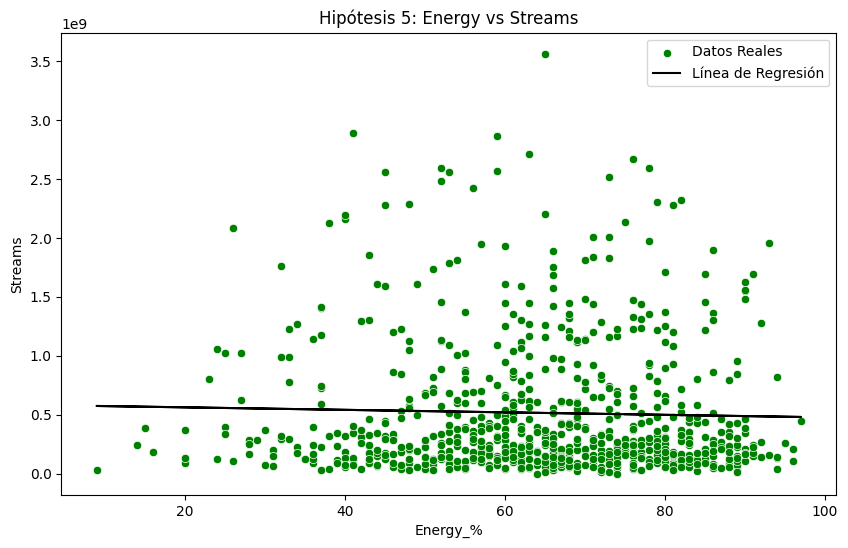

In [81]:
# Crear una gráfica de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train.flatten(), y=y_train, label='Datos Reales', color='green')

# Dibujar la línea de regresión
plt.plot(X_train, y_train_pred, color='black', label='Línea de Regresión')

plt.title('Hipótesis 5: Energy vs Streams')
plt.xlabel('Energy_%')
plt.ylabel('Streams')
plt.legend()
plt.show()

**6.Valence vs Streams**

Crear consulta con datos que necesitamos para nuestro dataframe

In [82]:
query = """
SELECT `valence_%`, streams_numero
FROM `proyecto2-hipotesis-lab.Dataset.view_plataformas`
"""

Crear dataframe

In [83]:
df = client.query(query).to_dataframe()

Limpieza de datos

In [84]:
df['streams_numero'] = pd.to_numeric(df['streams_numero'], errors='coerce')
df['valence_%'] = pd.to_numeric(df['valence_%'], errors='coerce')
df = df.dropna(subset=['streams_numero', 'valence_%'])
print(df.head())

   valence_%  streams_numero
0         44      1297026226
1         57      1355959075
2         48       786181836
3         28      1755214421
4         42      1592909789


Dividir los datos en conjuntos de entrenamiento y prueba

In [85]:
from sklearn.model_selection import train_test_split

# Dividir los datos en variables predictoras (X) y la variable objetivo (y)
X = df['valence_%']
y = df['streams_numero']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(755,) (189,) (755,) (189,)


In [86]:
import numpy as np

# Suponiendo que X_train es una lista o un array 1D
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(755, 1) (189, 1) (755,) (189,)


Entrenar y evaluar el modelo de la regresión lineal

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Crear una instancia del modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R^2): {r2}")

# Mostrar los coeficientes del modelo
print(f"Intercepción: {model.intercept_}")
print(f"Coeficiente: {model.coef_[0]}")

Error cuadrático medio (MSE): 3.182035009291737e+17
Coeficiente de determinación (R^2): 0.00187404416514092
Intercepción: 566138289.9384496
Coeficiente: -971945.7250246599


Un MSE de 3.182035009291737e+17 es extremadamente alto, indicando que las predicciones del modelo son bastante inexactas.

Un R² de 0.00187404416514092 significa que solo el 0.19% de la variabilidad en los streams puede ser explicada por la valence. Esto sugiere que la valence no es un buen predictor del éxito en términos de cantidad de streams en Spotify.

Intercepción (Intercept):
La intercepción es el valor de la cantidad de streams cuando la valence es 0. En este caso, la intercepción es de 566138289.9384496, lo que representa la predicción base de la cantidad de streams sin considerar la valence.

Coeficiente (Coefficient):
El coeficiente para la valence es -971945.7250246599. Esto significa que por cada unidad de aumento en la valence, se espera que la cantidad de streams disminuya en 971945.7250246599 unidades. Este coeficiente negativo sugiere una relación inversa entre valence y la cantidad de streams, aunque el efecto es relativamente pequeño comparado con la magnitud de los datos.

Conclusión
La hipótesis de que la valence influye significativamente en el éxito en términos de cantidad de streams en Spotify no se sostiene. El modelo muestra que la valence tiene un impacto mínimo y, de hecho, parece tener una relación negativa con la cantidad de streams. Además, la alta magnitud del MSE y el bajo R² indican que el modelo no es adecuado para predecir el éxito en términos de streams basándose en la valence.

**GRÁFICA**

Importar librerias

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Predecir en el conjunto de entrenamiento para dibujar la línea de regresión



In [89]:
y_train_pred = model.predict(X_train)

Crear una gráfica de dispersión

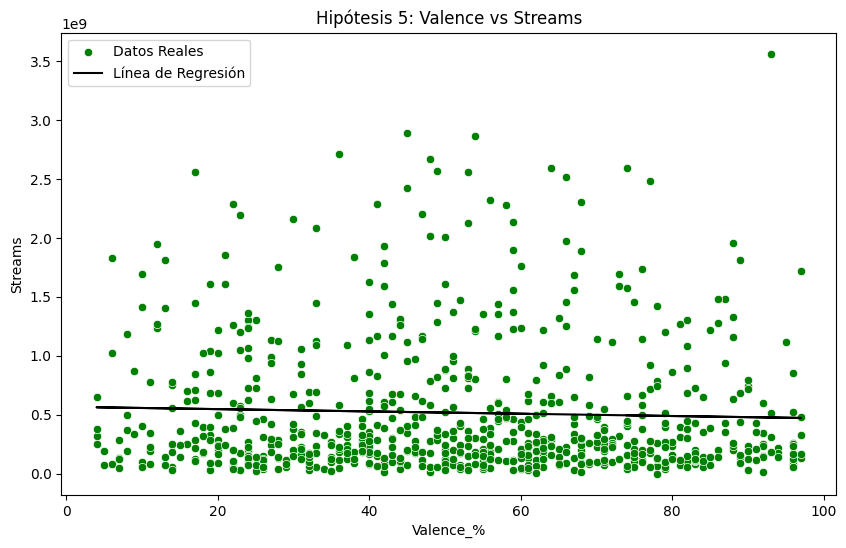

In [90]:
# Crear una gráfica de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train.flatten(), y=y_train, label='Datos Reales', color='green')

# Dibujar la línea de regresión
plt.plot(X_train, y_train_pred, color='black', label='Línea de Regresión')

plt.title('Hipótesis 5: Valence vs Streams')
plt.xlabel('Valence_%')
plt.ylabel('Streams')
plt.legend()
plt.show()

**7.Speechiness vs Streams**

Crear consulta con datos que necesitamos para nuestro dataframe

In [91]:
query = """
SELECT `speechiness_%`, streams_numero
FROM `proyecto2-hipotesis-lab.Dataset.view_plataformas`
"""

Crear dataframe

In [92]:
df = client.query(query).to_dataframe()

Limpieza de datos

In [93]:
df['streams_numero'] = pd.to_numeric(df['streams_numero'], errors='coerce')
df['speechiness_%'] = pd.to_numeric(df['speechiness_%'], errors='coerce')
df = df.dropna(subset=['streams_numero', 'speechiness_%'])
print(df.head())

   speechiness_%  streams_numero
0              3      1297026226
1              6      1355959075
2              4       786181836
3              3      1755214421
4              3      1592909789


Dividir los datos en conjuntos de entrenamiento y prueba

In [94]:
from sklearn.model_selection import train_test_split

# Dividir los datos en variables predictoras (X) y la variable objetivo (y)
X = df['speechiness_%']
y = df['streams_numero']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(755,) (189,) (755,) (189,)


In [95]:
import numpy as np

# Suponiendo que X_train es una lista o un array 1D
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(755, 1) (189, 1) (755,) (189,)


Entrenar y evaluar el modelo de la regresión lineal

In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Crear una instancia del modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R^2): {r2}")

# Mostrar los coeficientes del modelo
print(f"Intercepción: {model.intercept_}")
print(f"Coeficiente: {model.coef_[0]}")

Error cuadrático medio (MSE): 3.1839496713280416e+17
Coeficiente de determinación (R^2): 0.0012734618744032478
Intercepción: 586839521.0596712
Coeficiente: -7004805.666278839


Un MSE de 3.1839496713280416e+17 es extremadamente alto, indicando que las predicciones del modelo son bastante inexactas.

Un R² de 0.0012734618744032478 significa que solo el 0.13% de la variabilidad en los streams puede ser explicada por la speechiness. Esto sugiere que la speechiness no es un buen predictor del éxito en términos de cantidad de streams en Spotify.

Intercepción (Intercept):
La intercepción es el valor de la cantidad de streams cuando la speechiness es 0. En este caso, la intercepción es de 586839521.0596712, lo que representa la predicción base de la cantidad de streams sin considerar la speechiness.

Coeficiente (Coefficient):
El coeficiente para la speechiness es -7004805.666278839. Esto significa que por cada unidad de aumento en la speechiness, se espera que la cantidad de streams disminuya en 7004805.666278839 unidades. Este coeficiente negativo sugiere una relación inversa entre speechiness y la cantidad de streams, aunque el efecto es relativamente pequeño comparado con la magnitud de los datos.

Conclusión
La hipótesis de que la speechiness influye significativamente en el éxito en términos de cantidad de streams en Spotify no se sostiene. El modelo muestra que la speechiness tiene un impacto mínimo y, de hecho, parece tener una relación negativa con la cantidad de streams. Además, la alta magnitud del MSE y el bajo R² indican que el modelo no es adecuado para predecir el éxito en términos de streams basándose en la speechiness.

**GRÁFICA**

Importar librerias

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Predecir en el conjunto de entrenamiento para dibujar la línea de regresión



In [98]:
y_train_pred = model.predict(X_train)

Crear una gráfica de dispersión

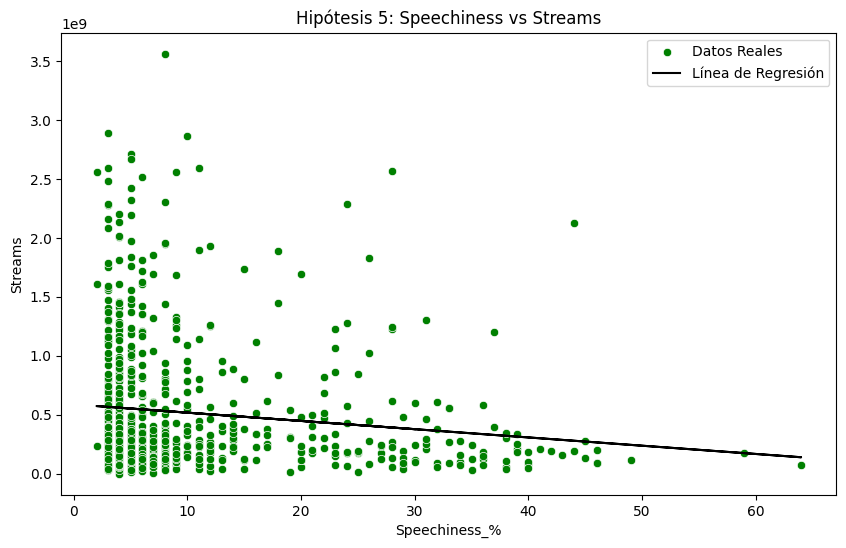

In [99]:
# Crear una gráfica de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train.flatten(), y=y_train, label='Datos Reales', color='green')

# Dibujar la línea de regresión
plt.plot(X_train, y_train_pred, color='black', label='Línea de Regresión')

plt.title('Hipótesis 5: Speechiness vs Streams')
plt.xlabel('Speechiness_%')
plt.ylabel('Streams')
plt.legend()
plt.show()